link to chatgpt prompts i have used: https://chatgpt.com/share/0afe483a-5bb5-4e45-a212-aeffb4f97850

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

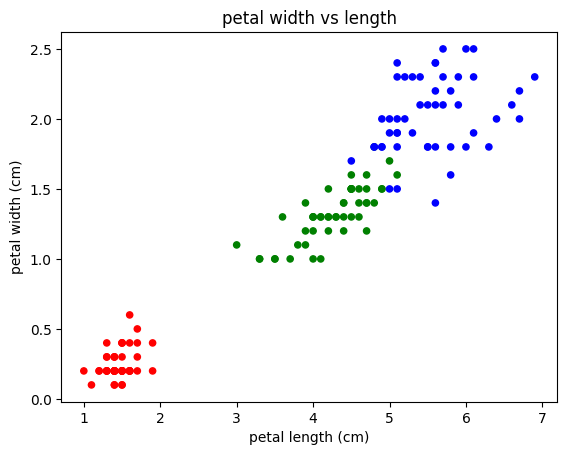

In [ ]:
#EXERCISE 1 TASK 2
import pandas as pd
from sklearn.datasets import load_iris


iris = load_iris()


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


df['species'] = iris.target


df['species'] = df['species'].map(dict(enumerate(iris.target_names)))


print(df)
df.info()


avg_petal_len = df['petal length (cm)'].mean()
print("avg_petal_len", avg_petal_len)


vers_df = df[df['species'] == 'versicolor']
avg_petal_wid_vers = vers_df['petal width (cm)'].mean()
print("avg_petal_wid_vers", avg_petal_wid_vers)


med_sepal_len = df['sepal length (cm)'] .median()
print("med_sepal_len", med_sepal_len)


virg_df = df[df['species'] == 'virginica']
med_sepal_wid_virg = virg_df['sepal width (cm)'].median()
print("med_sepal_wid_virg", med_sepal_wid_virg)


seto_df = df[df['species'] == 'setosa']
seto_df.info()


pear_corr_sepal = df[['sepal length (cm)', 'sepal width (cm)']].corr()
pear_corr_sepal_num = pear_corr_sepal.loc['sepal length (cm)', 'sepal width (cm)']
print("pear_corr_sepal_num", pear_corr_sepal_num)


pear_corr_petal_vers = vers_df[['petal length (cm)', 'petal width (cm)']].corr()
pear_corr_petal_vers_num = pear_corr_petal_vers.loc['petal length (cm)', 'petal width (cm)']
print("pear_corr_petal_vers_num", pear_corr_petal_vers_num)


df['color'] = df['species'].map({'setosa': 'red', 'virginica': 'blue', 'versicolor': 'green'})
scat_plot = df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c=df['color'], title='petal width vs length')

EXERCISE 1 TASK 3 - setosa are the smallest flowers, virginica are the bigggest, versicolor are medium, all spiecies petals have same proportions of width to length as the dots on the plot create a straight line

EXERCISE 3
Logistic Regression takes training set of data with features and a categorical target then makes a curve of probability based on those features and a labeled target. For example if you have only one feature which is height of the iris and you are predicting the species, you have 3 flowers from spieces A with height of 10 and 1 flower of species B with the same height then the probability is 75% that the species is A so when the model is used on testing set of data and predicts species of a flower with height of 10 he is going to output that it is A because the probability that it is A is more than 50%(only in case of a binary target). The model does this for every available value of the feature and makes a probability curve. If you have more features then the model does the same for every feature and finds most accurate weights for the features based on feature's contribution to the prediction. Features are multiplied by the weights and added up in the same function which then chooses categorical target with the highest likelyhood.

Pros:
1. pretty simple and easy to understand compared to more complex models
2. does not require much computional power compared to more complex models and it is fast

Cons:
1. logistic regression assumes linear relationship between the features and the target while sometimes the relationship is not linear an the model performs not well.
2. logistic regression is sensitive to outliers which might disort the accuracy.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

setosa_df = df[df['species'] == 0]
versicolor_df = df[df['species'] == 1]
virginica_df = df[df['species'] == 2]

setosa_train, setosa_test = train_test_split(setosa_df, test_size=0.3, random_state=42)
versicolor_train, versicolor_test = train_test_split(versicolor_df, test_size=0.3, random_state=42)
virginica_train, virginica_test = train_test_split(virginica_df, test_size=0.3, random_state=42)

train_df = pd.concat([setosa_train, versicolor_train, virginica_train])
test_df = pd.concat([setosa_test, versicolor_test, virginica_test])

X_train = train_df[iris.feature_names]
y_train = train_df['species']
X_test = test_df[iris.feature_names]
y_test = test_df['species']

model = LogisticRegression()

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)


Test Accuracy: 0.9777777777777777
Train Accuracy: 0.9523809523809523
